In [2]:
from src.Evolution import breed_population,evolve_knapsack_population
from src.KnapsackItem import Item
from src.KnapsackIndividual import Individual
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
items = list(set([(np.random.randint(1,10),np.random.randint(1,10)) for x in range(30)])) # item = (weight,value)
def total_value(items, max_weight):
    return  sum([x[1] for x in items]) if sum([x[0] for x in items]) <= max_weight else 0
cache = {}
def solve(items, max_weight):
    if not items:
        return ()
    if (items,max_weight) not in cache:
        head = items[0]
        tail = items[1:]
        include = (head,) + solve(tail, max_weight - head[0])
        dont_include = solve(tail, max_weight)
        if total_value(include, max_weight) > total_value(dont_include, max_weight):
            answer = include
        else:
            answer = dont_include
        cache[(items,max_weight)] = answer
    return cache[(items,max_weight)] 

In [4]:
max_weight = 100
solution = solve(tuple(items), max_weight)

In [5]:
np.sum([x[0] for x in list(solution)])

98

In [6]:
np.sum([x[1] for x in list(solution)])

123

In [7]:
items_ = [Item(x[0], x[1]) for x in items]
individuals = [Individual(items_, max_weight=100) for x in range(5)]

In [8]:
g,mev,w,v,f,mf,pop,bog,matings,pop_record = evolve_knapsack_population(individuals,0.25,8,20,0.2)

Generation 0
60.0% Population Legal
Mean Fitness: 125552.49894158407
Best Value: 117
Most Fit:
   value: 117 weight: 97 fitness: 147629.64260945903
Generation 1
100.0% Population Legal
Mean Fitness: 122551.07731135908
Best Value: 117
Most Fit:
   value: 117 weight: 97 fitness: 147629.64260945903
Generation 2
100.0% Population Legal
Mean Fitness: 133822.45377347994
Best Value: 117
Most Fit:
   value: 117 weight: 97 fitness: 147629.64260945903
Generation 3
100.0% Population Legal
Mean Fitness: 139122.9118504645
Best Value: 117
Most Fit:
   value: 117 weight: 97 fitness: 147629.64260945903
Generation 4
100.0% Population Legal
Mean Fitness: 139122.9118504645
Best Value: 117
Most Fit:
   value: 117 weight: 97 fitness: 147629.64260945903
Generation 5
100.0% Population Legal
Mean Fitness: 139122.9118504645
Best Value: 117
Most Fit:
   value: 117 weight: 97 fitness: 147629.64260945903
Generation 6
100.0% Population Legal
Mean Fitness: 147629.64260945903
Best Value: 117
Most Fit:
   value: 117 

In [9]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

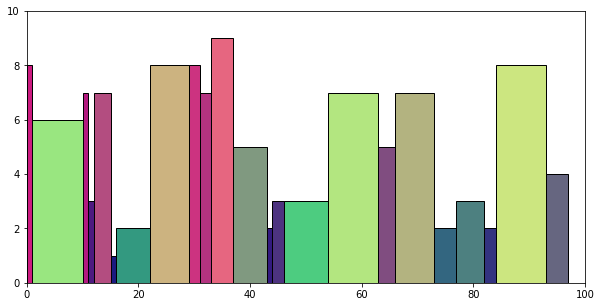

In [10]:
t = bog[2]

f = plt.figure(figsize=(10,5))
ax = f.add_subplot(111)
def draw_knapsack(t,ax):
    xs = 0
    for s in t.items:
        ax.add_patch(patches.Rectangle((xs,0),s.weight,s.value,edgecolor="black",facecolor=(s.value/10,s.weight/10, 0.5)))
        xs+=s.weight
    plt.xlim(0,100)
    plt.ylim(0,10)
    
draw_knapsack(t,ax)

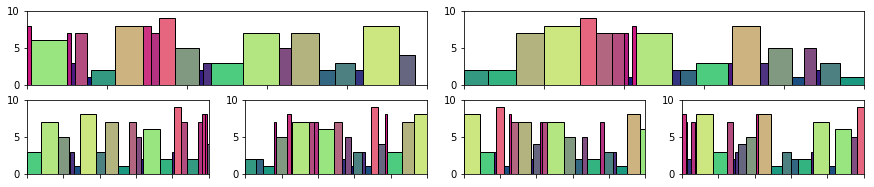

In [11]:
#Function to render matings into a family tree
#For a mating, show parents and offspring
#Row 1: Two parents
#Row 2: 4 Offspring
def drawMating(mating):
    plt.figure(figsize=(15,3))
    pax1 = plt.subplot2grid((2,4), (0,0), colspan=2)
    draw_knapsack(mating.parent_a,pax1)
    pax2 = plt.subplot2grid((2,4), (0,2), colspan=2)
    draw_knapsack(mating.parent_b,pax2)
    cax1 = plt.subplot2grid((2,4), (1,0))
    draw_knapsack(mating.children[0],cax1)
    cax2 = plt.subplot2grid((2,4), (1,1))
    draw_knapsack(mating.children[1],cax2)
    cax3 = plt.subplot2grid((2,4), (1,2))
    draw_knapsack(mating.children[2],cax3)
    cax4 = plt.subplot2grid((2,4), (1,3))
    draw_knapsack(mating.children[3],cax4)
    plt.setp(pax1.get_xticklabels(), visible=False)
    plt.setp(pax2.get_xticklabels(), visible=False)
    plt.setp(cax1.get_xticklabels(), visible=False)
    plt.setp(cax2.get_xticklabels(), visible=False)
    plt.setp(cax3.get_xticklabels(), visible=False)
    plt.setp(cax4.get_xticklabels(), visible=False)
    
drawMating(matings[0][0])


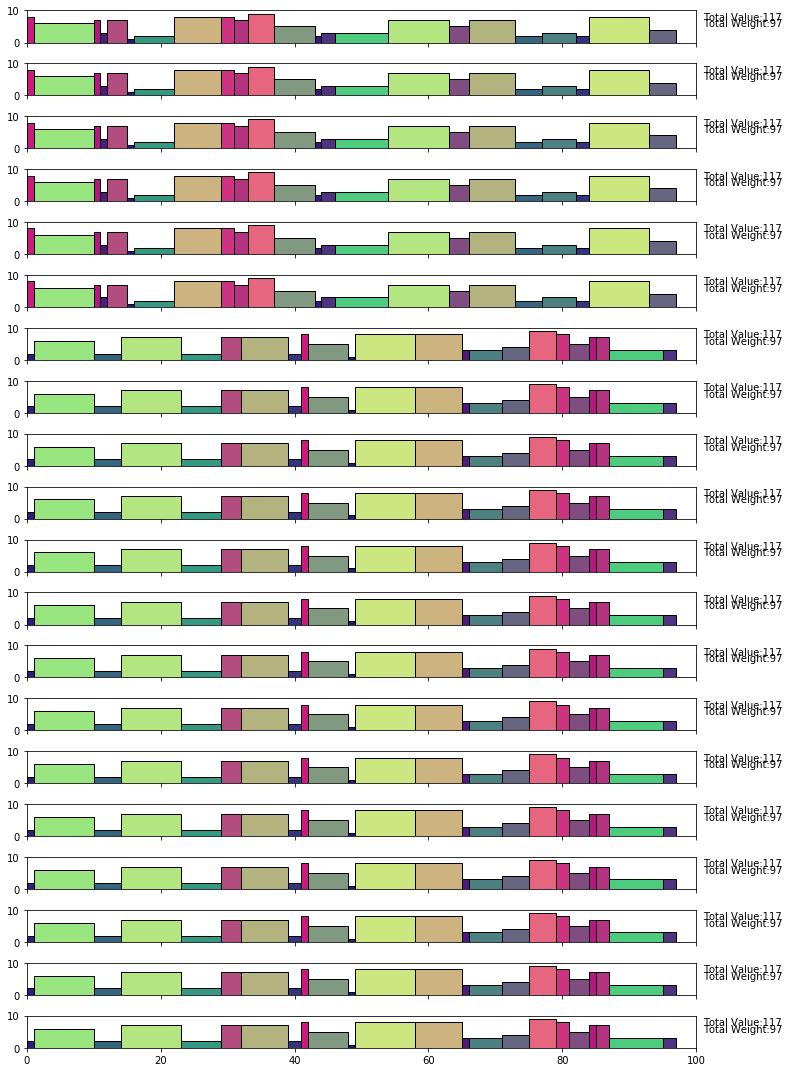

In [12]:
def draw_population(bog):
    f = plt.figure(figsize=(10,15))
    nbg = len(bog)
    for n,i in enumerate(bog):
    
        ax = f.add_subplot(nbg,1,n+1)
        draw_knapsack(i,ax)
        ax.text(101,7,"Total Value:{}".format(i.total_value()))
        ax.text(101,5,"Total Weight:{}".format(i.total_weight()))
        if n < nbg -1:
            plt.setp(ax.get_xticklabels(), visible=False)
    f.tight_layout()
    
draw_population(bog)

In [13]:
x = bog[0]

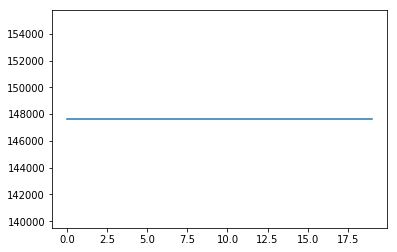

In [14]:
plt.plot([x.fitness_score() for x in bog])

In [6]:
def bla(x,y):
    return x**2 - 50*x + y**2

def rosenbrok(x,y):
    return (1 - x)**2 + 100 * (y -x **2)**2
    

In [111]:
xs = []
ys = []
zs = []
for x in np.arange(-5,5,0.05):
    for y in np.arange(-5,5,0.05):
        xs.append(x)
        ys.append(y)
        zs.append(rosenbrok(x,y))
    

In [88]:
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

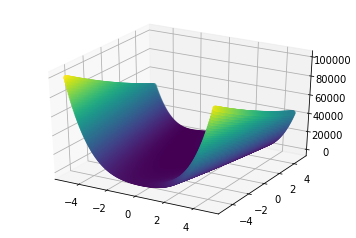

In [74]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys,zs,c=zs)

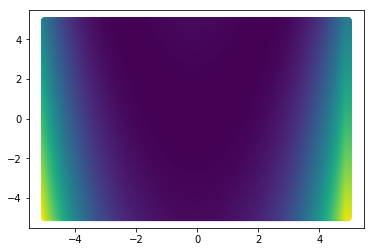

In [112]:
plt.scatter(xs,ys,c=zs)

In [29]:
from src.FunctionOptimizerIndividual import FunctionMinimizer2DIndividual
from src.Evolution import evolve_numeric_optimizer_population

In [46]:
f2di = [FunctionMinimizer2DIndividual(rosenbrok,np.random.randint(-5,1),np.random.randint(-5,1)) for x in range(10)]
f2di = f2di + [FunctionMinimizer2DIndividual(rosenbrok,np.random.randint(-7,-6),np.random.randint(-7,-6)) for x in range(10)]

In [55]:
generations,xs,ys,fitness_scores,mean_fitness_scores,population,best_of_generations,population_record = evolve_numeric_optimizer_population(f2di,0.2,4,300,0.05)

Generation 0
Generation 1
Generation 2
Generation 3
Generation 4
Generation 5
Generation 6
Generation 7
Generation 8
Generation 9
Generation 10
Generation 11
Generation 12
Generation 13
Generation 14
Generation 15
Generation 16
Generation 17
Generation 18
Generation 19
Generation 20
Generation 21
Generation 22
Generation 23
Generation 24
Generation 25
Generation 26
Generation 27
Generation 28
Generation 29
Generation 30
Generation 31
Generation 32
Generation 33
Generation 34
Generation 35
Generation 36
Generation 37
Generation 38
Generation 39
Generation 40
Generation 41
Generation 42
Generation 43
Generation 44
Generation 45
Generation 46
Generation 47
Generation 48
Generation 49
Generation 50
Generation 51
Generation 52
Generation 53
Generation 54
Generation 55
Generation 56
Generation 57
Generation 58
Generation 59
Generation 60
Generation 61
Generation 62


C:\Users\james\Documents\GA\GeneticKnapsack\GeneticAlgorithms\src\Evolution.py:18: RuntimeWarning: invalid value encountered in long_scalars
  probabilities = [x.fitness_score()/total_fitness for x in population]
C:\Users\james\Documents\GA\GeneticKnapsack\GeneticAlgorithms\src\Evolution.py:20: RuntimeWarning: invalid value encountered in less
  partner_a = np.random.choice(population,size=1,p=probabilities)[0]
C:\Users\james\Documents\GA\GeneticKnapsack\GeneticAlgorithms\src\Evolution.py:21: RuntimeWarning: invalid value encountered in less
  partner_b = np.random.choice(population,size=1,p=probabilities)[0]


Generation 63
Generation 64
Generation 65
Generation 66
Generation 67
Generation 68
Generation 69
Generation 70
Generation 71
Generation 72
Generation 73
Generation 74
Generation 75
Generation 76
Generation 77
Generation 78
Generation 79
Generation 80
Generation 81
Generation 82
Generation 83
Generation 84
Generation 85
Generation 86
Generation 87
Generation 88
Generation 89
Generation 90
Generation 91
Generation 92
Generation 93
Generation 94
Generation 95
Generation 96
Generation 97
Generation 98
Generation 99
Generation 100
Generation 101
Generation 102
Generation 103
Generation 104
Generation 105
Generation 106
Generation 107
Generation 108
Generation 109
Generation 110
Generation 111
Generation 112
Generation 113
Generation 114
Generation 115
Generation 116
Generation 117
Generation 118
Generation 119
Generation 120
Generation 121
Generation 122
Generation 123
Generation 124
Generation 125
Generation 126
Generation 127
Generation 128
Generation 129
Generation 130
Generation 131
Ge

In [56]:
movements = [(np.mean([i.x for i in b]),np.mean([i.y for i in b]),np.mean([i.z for i in b])) for b in population_record]

xss = [i[0] for i in movements]
yss = [i[1] for i in movements]
zss = [i[2] for i in movements]

In [141]:
xs = []
ys = []
zs = []
for x in np.arange(-5,5,0.01):
    for y in np.arange(-5,5,0.1):
        xs.append(x)
        ys.append(y)
        zs.append(rosenbrok(x,y))
    

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


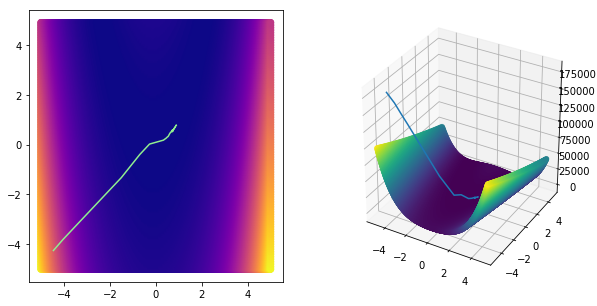

In [143]:
fig = plt.figure(figsize=(10,5))
plt.subplot(121)
plt.scatter(xs,ys,c=zs,cmap=cm.plasma)
plt.plot(xss,yss,c='lightgreen')
plt.subplot(122)
ax = fig.add_subplot(122, projection='3d')
ax.scatter(xs, ys,zs,c=zs,cmap=cm.plasma)
plt.plot(xss,yss,zss)

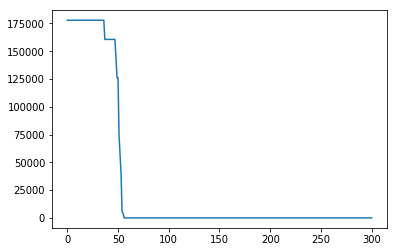

In [59]:
plt.plot(zss)

In [22]:
[x.fitness_score()/total_fitness for x in f2di]

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.44677137870855149,
 0.0,
 0.0,
 0.0,
 0.31588132635253052,
 0.0,
 0.0,
 0.0,
 0.23734729493891799]

In [83]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
import os, sys
import numpy as np
 
 
##### TO CREATE A SERIES OF PICTURES
 
def make_views(ax,angles,elevation=None, width=4, height = 3,
                prefix='tmprot_',**kwargs):
    """
    Makes jpeg pictures of the given 3d ax, with different angles.
    Args:
        ax (3D axis): te ax
        angles (list): the list of angles (in degree) under which to
                       take the picture.
        width,height (float): size, in inches, of the output images.
        prefix (str): prefix for the files created. 
     
    Returns: the list of files created (for later removal)
    """
     
    files = []
    ax.figure.set_size_inches(width,height)
     
    for i,angle in enumerate(angles):
     
        ax.view_init(elev = elevation, azim=angle)
        fname = '%s%03d.jpeg'%(prefix,i)
        ax.figure.savefig(fname)
        files.append(fname)
     
    return files
 
 
 
##### TO TRANSFORM THE SERIES OF PICTURE INTO AN ANIMATION
 
def make_movie(files,output, fps=10,bitrate=1800,**kwargs):
    """
    Uses mencoder, produces a .mp4/.ogv/... movie from a list of
    picture files.
    """
     
    output_name, output_ext = os.path.splitext(output)
    command = { '.mp4' : 'mencoder "mf://%s" -mf fps=%d -o %s.mp4 -ovc lavc\
                         -lavcopts vcodec=msmpeg4v2:vbitrate=%d'
                         %(",".join(files),fps,output_name,bitrate)}
                          
    command['.ogv'] = command['.mp4'] + '; ffmpeg -i %s.mp4 -r %d %s'%(output_name,fps,output)
     
    print(command[output_ext])
    output_ext = os.path.splitext(output)[1]
    os.system(command[output_ext])
 
 
 
def make_gif(files,output,delay=100, repeat=True,**kwargs):
    """
    Uses imageMagick to produce an animated .gif from a list of
    picture files.
    """
     
    loop = -1 if repeat else 0
    os.system('convert -delay %d -loop %d %s %s'
              %(delay,loop," ".join(files),output))
 
 
 
 
def make_strip(files,output,**kwargs):
    """
    Uses imageMagick to produce a .jpeg strip from a list of
    picture files.
    """
     
    os.system('montage -tile 1x -geometry +0+0 %s %s'%(" ".join(files),output))
     
     
     
##### MAIN FUNCTION
 
def rotanimate(ax, angles, output, **kwargs):
    """
    Produces an animation (.mp4,.ogv,.gif,.jpeg,.png) from a 3D plot on
    a 3D ax
     
    Args:
        ax (3D axis): the ax containing the plot of interest
        angles (list): the list of angles (in degree) under which to
                       show the plot.
        output : name of the output file. The extension determines the
                 kind of animation used.
        **kwargs:
            - width : in inches
            - heigth: in inches
            - framerate : frames per second
            - delay : delay between frames in milliseconds
            - repeat : True or False (.gif only)
    """
         
    output_ext = os.path.splitext(output)[1]
 
    files = make_views(ax,angles, **kwargs)
     
    D = { '.mp4' : make_movie,
          '.ogv' : make_movie,
          '.gif': make_gif ,
          '.jpeg': make_strip,
          '.png':make_strip}
           
    D[output_ext](files,output,**kwargs)
     
    